In [1]:
import datetime
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
from WindPy import w
import os
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

# 定义常量

In [3]:
risk_free = 0.015 # 1年期定期存款利率

In [4]:
def sharpe_ratio(an_ret, an_vol, risk_free):
    return (an_ret - risk_free) / an_vol

In [5]:
today = datetime.datetime.today()

In [6]:
# if datetime.date.weekday(today) == 4:
#     next_date = today + datetime.timedelta(3)
# else:
#     next_date = today + datetime.timedelta(1)
next_date = today # 在jupyter中生成的是当日的数据

In [7]:
next_date.strftime("%Y-%m-%d")

'2019-11-11'

In [8]:
DIR = u'D:/Data/江苏银行/%s'%(next_date.strftime('%Y%m%d'))
if not os.path.exists(DIR):
    os.mkdir(DIR)

In [9]:
# SDIR = u'\\\\hfm-pubshare\HFM各部门共享\Harvest嘉实全体员工\策略孵化组\多重风管分组审核\zhangyang\江苏银行全球购策略\数据'
# if not os.path.exists(SDIR):
#     os.mkdir(SDIR)

#### 组合代码

In [10]:
PORTFOLIO_CODE = 'JSJJ01'

#### 组合名称

In [11]:
PORTFOLIO_NAME = u'一键买全球'

#### 基金公司对应TA代码

In [12]:
COMP2TA = {u'嘉实基金': '07',
           u'华夏基金': '03',
           u'博时基金': '05',
           u'鹏华基金': '06'}

#### 基金产品列表

In [13]:
# FUNDS = ['070037.OF', '160706.OF', '000008.OF', '070023.OF', '160716.OF', '000342.OF', '000341.OF', '000071.OF', '050025.OF', '000290.OF']
# FUNDS = ['070002.OF', '070009.OF', '070012.OF', '070025.OF', '070026.OF'] # 测试1
FUNDS = ['070002.OF', '070012.OF', '070025.OF', '070026.OF'] # 测试2
# FUNDS = ['070037.OF', '160706.OF', '000008.OF', '000071.OF', '050025.OF'] # 测试3

#### 基金产品类型

In [14]:
# FUND_TYPES = [2, 1, 1, 1, 1, 7, 7, 7, 7, 7]
# FUND_TYPES = [1, 2, 7, 2, 2] # 测试1
FUND_TYPES = [1, 1, 7, 2, 2] # 测试2
# FUND_TYPES = [2, 1, 1, 7, 7] # 测试3

#### 基金公司名称

In [15]:
# COMPS = [u'嘉实基金'] * 7 + [u'华夏基金', u'博时基金', u'鹏华基金']
# COMPS = [u'嘉实基金'] * 5 # 测试1
COMPS = [u'嘉实基金'] * 4 # 测试2
# COMPS = [u'嘉实基金'] * 3 +  [u'华夏基金', u'博时基金'] # 测试3

#### 基金产品名称

In [16]:
FUND_NAMES = [w.wss(code, 'name_official').Data[0][0] for code in FUNDS]

In [17]:
for name in FUND_NAMES:
    print name

嘉实增长混合
嘉实海外中国股票混合(QDII)
嘉实信用债券A
嘉实信用债券C


# 生成组合产品池文件

In [18]:
lines = []
for i, code in enumerate(FUNDS):
    line = '|'.join([COMP2TA[COMPS[i]], COMPS[i], code.rstrip('.OF'), FUND_NAMES[i], str(FUND_TYPES[i])])
    lines.append(line)

In [19]:
fname = u'%s/COMB_PRD_00JSCL_%s.TXT'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('\n'.join(lines).encode('GBK'))
fname = u'%s/COMB_PRD_00JSCL_%s.TXT.OK'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('')

In [20]:
# fname = u'%s/COMB_PRD_00JSCL_%s.TXT'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('\n'.join(lines).encode('GBK'))
# fname = u'%s/COMB_PRD_00JSCL_%s.TXT.OK'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('')

# 生成组合信息文件

In [21]:
# wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet2')
# wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet1') # 测试1
wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet3') # 测试2
# wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet4') # 测试3

In [22]:
wdf = wdf[wdf.index >= '2018-10-01'].dropna() # 最近一年

In [23]:
wdf.tail()

,070002,070012,070025,070026
2019-11-04,0.25,0.25,0.25,0.25
2019-11-05,0.25,0.25,0.25,0.25
2019-11-06,0.25,0.25,0.25,0.25
2019-11-07,0.25,0.25,0.25,0.25
2019-11-08,0.25,0.25,0.25,0.25


In [24]:
elements = []
elements.append(PORTFOLIO_CODE)                                             # 组合编号
elements.append(PORTFOLIO_NAME)                                             # 组合名称
elements.append(','.join([COMP2TA[c] for c in COMPS]))                      # TA代码
elements.append(','.join(COMPS))                                            # TA名称
elements.append(','.join([code.rstrip('.OF') for code in FUNDS]))           # 产品代码
elements.append(','.join(FUND_NAMES))                                       # 产品名称
elements.append(','.join([str(0)] * len(FUNDS)))                            # 产品属性
elements.append(','.join(['%.8f'%(weight) for weight in wdf.iloc[-1]]))     # 产品占比
elements.append('720-1800')                                                 # 投资期限
elements.append('4')                                                        # 风险承受能力
elements.append(today.strftime('%Y%m%d'))                                   # 组合调整日期
elements.append(' ')                                                        # 组合调整说明
elements.append(' ')                                                        # 投资金额
elements.append(' ')                                                        # 策略方生效日期
elements.append(' ')                                                        # 年龄
elements.append('000001')                                                   # 策略维度类别
elements.append(' ')                                                        # 组合区间信息传
elements.append(' ')                                                        # 置信区间
elements.append(' ')                                                        # 组合穿透产品底层后真实资产类型
elements.append(' ')                                                        # 组合穿透产品底层后真实资产类型占比
elements.append(' ')                                                        # 组合管理人代码
elements.append(' ')                                                        # 组合管理人名称
elements.append(' ')                                                        # 策略方案
elements.append(' ')                                                        # 策略类型代码
elements.append(' ')                                                        # 策略类型名称
elements.append(' ')                                                        # 组合策略描述
elements.append(' ')                                                        # 组合风险描述
elements.append(' ')                                                        # 备用字段12
elements.append(' ')                                                        # 备用字段13

In [25]:
fname = u'%s/COMB_INFOR_00JSCL_%s.TXT'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('|'.join(elements).encode('GBK'))
fname = u'%s/COMB_INFOR_00JSCL_%s.TXT.OK'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('')

In [26]:
# fname = u'%s/COMB_INFOR_00JSCL_%s.TXT'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('|'.join(elements).encode('GBK'))
# fname = u'%s/COMB_INFOR_00JSCL_%s.TXT.OK'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('')

# 生成组合行情文件

## 获取基金历史行情

In [27]:
start_date, end_date = wdf.index[0], today - datetime.timedelta(2)

In [28]:
data = w.wsd(FUNDS, 'nav', start_date, end_date)

In [29]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)
df.index = pd.to_datetime(df.index)

In [30]:
rdf = df.pct_change()

In [31]:
df.tail()

,070002.OF,070012.OF,070025.OF,070026.OF
2019-11-04,12.733,0.880,1.228,1.211
2019-11-05,12.777,0.883,1.229,1.213
2019-11-06,12.690,0.879,1.230,1.213
2019-11-07,12.777,0.886,1.230,1.213
2019-11-08,12.822,0.886,1.230,1.213


In [32]:
wdf.columns = rdf.columns

In [33]:
if rdf.shape[0] > wdf.shape[0]: # 补充完整
    print('Append')
    app_df = pd.DataFrame(np.nan, columns=wdf.columns, index=rdf[rdf.index > wdf.index[-1]].index)
    wdf = wdf.append(app_df)
    wdf = wdf.fillna(method='ffill')

In [34]:
assert(rdf.shape == wdf.shape)

## 测算组合收益率

In [35]:
portfolio_ret = (wdf * rdf).sum(axis=1)

In [36]:
portfolio_ret.tail()

2019-11-04    0.006445
2019-11-05    0.002333
2019-11-06   -0.002631
2019-11-07    0.003705
2019-11-08    0.000880
dtype: float64

## 业绩基准

In [37]:
bench_index = '000300.SH,H11001.CSI'
data = w.wsd(bench_index, 'pct_chg', portfolio_ret.index[0], portfolio_ret.index[-1])

In [38]:
bench = pd.DataFrame(np.array(data.Data).T / 100, index=data.Times, columns=bench_index.split(','))

In [39]:
bench_ret = bench['000300.SH'] * 0.9 + bench['H11001.CSI'] * 0.1

In [40]:
total_invest = 10000
mu, sigma = empyrical.annual_return(portfolio_ret), empyrical.annual_volatility(portfolio_ret)
rho = 1.65
confidence = u'投资%d元，持有一年，模拟历史收益：%d元，90%%的概率下亏损不超过%d元'%\
            (total_invest, mu * total_invest, abs((mu - sigma) * rho * total_invest))

In [41]:
elements = []
elements.append(today.strftime("%Y%m%d"))                                                      # 发布日期
elements.append(PORTFOLIO_CODE)                                                                # 组合编号
elements.append(PORTFOLIO_NAME)                                                                # 组合名称
elements.append('%.8f'%(empyrical.annual_return(portfolio_ret)))                               # 组合年化收益率
elements.append('%.8f'%(empyrical.annual_volatility(portfolio_ret)))                           # 组合年化波动率
elements.append('%.8f'%(-empyrical.max_drawdown(portfolio_ret)))                               # 组合最大回撤率
elements.append('%.8f'%(sharpe_ratio(empyrical.annual_return(portfolio_ret), \
                                     empyrical.annual_volatility(portfolio_ret), risk_free)))  # 夏普比率
elements.append('%.8f'%(empyrical.cum_returns_final(bench_ret)))                               # 组合业绩基准收益率
elements.append('%.8f'%(1 + empyrical.cum_returns_final(portfolio_ret)))                       # 组合净值
elements.append('%.8f'%(1 + empyrical.cum_returns_final(portfolio_ret)))                       # 组合累计净值
elements.append(' ')                                                                           # 组合规模
elements.append('%.8f'%(portfolio_ret[-1]))                                                    # 组合日涨幅
elements.append('%.8f'%(empyrical.cum_returns_final(portfolio_ret)))                           # 组合累计收益率
elements.append('%.8f'%(empyrical.cum_returns_final(bench_ret)))                               # 业绩基准累计收益率
elements.append('%s'%(confidence))                                                             # 置信区间
elements.append('0,b')                                                                         # 业绩基准指数类型
elements.append('0.9,0.1')                                                                     # 业绩基准指数类型占比
elements.append(' ')                                                                           # 备用字段2
elements.append(' ')                                                                           # 备用字段3
elements.append(' ')                                                                           # 备用字段4
elements.append(' ')                                                                           # 备用字段5
elements.append('')                                                                            # 结束符

In [42]:
bench_ret[0] = 0

In [43]:
empyrical.cum_returns_final(portfolio_ret)

0.15960646672978296

In [44]:
fname = u'%s/COMB_MARKET_00JSCL_%s.TXT'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('|'.join(elements).encode('GBK'))
fname = u'%s/COMB_MARKET_00JSCL_%s.TXT.OK'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('')

In [45]:
# fname = u'%s/COMB_MARKET_00JSCL_%s.TXT'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('|'.join(elements).encode('GBK'))
# fname = u'%s/COMB_MARKET_00JSCL_%s.TXT.OK'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('')

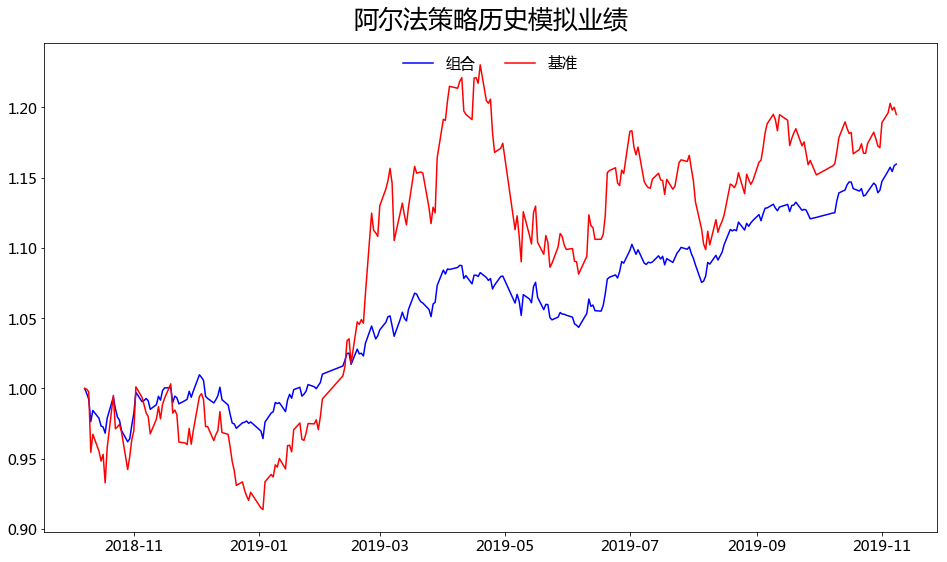

In [46]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1 + portfolio_ret).cumprod(), color='blue', label=u'组合')
lns2 = ax.plot((1 + bench_ret).cumprod(), color='red', label=u'基准')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.0))

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title(u'阿尔法策略历史模拟业绩', fontsize=25, y=1.02)

In [47]:
odf = pd.DataFrame({u'组合': ((1 + portfolio_ret).cumprod() - 1),
                    u'基准': ((1 + bench_ret).cumprod() - 1)})

In [48]:
odf.to_excel(u'../data/组合历史收益率.xlsx')